# Setup

In [1]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import os
import json
import numpy as np

In [2]:
load_dotenv(find_dotenv())

True

In [3]:
cloud_id = os.environ.get("CLOUD_ID")
api_key = os.environ.get("API_KEY")

In [4]:
es = Elasticsearch(cloud_id=cloud_id, api_key=api_key)

In [5]:
es.info()

ObjectApiResponse({'name': 'instance-0000000000', 'cluster_name': '1aefb5b043094a6ab6aa373a1fe311df', 'cluster_uuid': '4x3rb70ISxaylYI7fsA4Ow', 'version': {'number': '8.15.2', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '98adf7bf6bb69b66ab95b761c9e5aadb0bb059a3', 'build_date': '2024-09-19T10:06:03.564235954Z', 'build_snapshot': False, 'lucene_version': '9.11.1', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [6]:
es.indices.delete(index="review_index", ignore_unavailable=True)

ObjectApiResponse({'acknowledged': True})

# Review Data

In [7]:
reviews = pd.read_json("../data/mo_business_reviews.json")
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01
1,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4,1,0,0,The hubby and I have been here on multiple occ...,2014-08-10 19:41:43
2,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13 19:49:51
3,yCbzm_d4cHpfUX00Ljvgmg,bHSoye7R5cL-LVWLxtaxMg,SSZDGl2J-CEyIzuIbEiYNQ,2,2,0,0,"We started with the artichoke dip, big mistake...",2017-09-08 23:20:19
4,-up4mW6WdqzGrRh7t_pLmA,xbybLiQockAzC4xAlzFrGg,EpREWeEpmR8f1qLHzzF0AA,5,0,0,0,After living in the STL area for way over 10 y...,2011-11-30 06:58:36
...,...,...,...,...,...,...,...,...,...
502380,flql0FgydC3n0Hwx6kcJoQ,V3XYG1zKuW8VUBNtjacoxA,oHvEgLH6pAkcrPmeR1l3UQ,5,7,0,2,We are huge Retreat fans! One of my favorite t...,2018-04-26 05:15:22
502381,ND5Oq45jqd_dSbBD6i73kw,ezqvnYDS8WD2KshapwQ3Yw,VpJzlz3bKOJtiI1rb9kTpw,4,13,4,11,"I have been to this place a few times, for lun...",2015-06-02 17:16:41
502382,A1Lv5xmgj2jPDIa2bF1byg,UfevNSM_H14XXWZFlHYPoA,TNtcjnta11CpDebuBNdoug,2,0,1,0,Our waiter was good but a bit rushed. I didn't...,2017-10-22 20:55:12
502383,E5sXn_qdPX5qRxUEApmiuA,Mc4C7fVY0sEcD-U5eOA2Og,ZNfph3_VzRLTOemk9Tmzaw,3,5,0,1,This gym gets the job done. \n\nUpsides: \nChi...,2016-01-25 21:45:34


In [8]:
print(reviews.columns)
print(reviews.iloc[0].to_dict())

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')
{'review_id': 'XW_LfMv0fV21l9c6xQd_lw', 'user_id': '9OAtfnWag-ajVxRbUTGIyg', 'business_id': 'lj-E32x9_FA7GmUrBGBEWg', 'stars': 4, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "Love going here for happy hour or dinner!  Great patio with fans to beat the StL heat!   Also...very accomodating at this location.  I like the Veal Milanese but with mixed greens instead of pasta!  they'll modify the menu to suit your taste!", 'date': Timestamp('2014-06-27 22:44:01')}


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502385 entries, 0 to 502384
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    502385 non-null  object        
 1   user_id      502385 non-null  object        
 2   business_id  502385 non-null  object        
 3   stars        502385 non-null  int64         
 4   useful       502385 non-null  int64         
 5   funny        502385 non-null  int64         
 6   cool         502385 non-null  int64         
 7   text         502385 non-null  object        
 8   date         502385 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 34.5+ MB


In [10]:
reviews.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [11]:
reviews[reviews['user_id'] == "bYENop4BuQepBjM1-BI3fA"]['text'].duplicated().sum()

0

In [12]:
len(reviews)

502385

In [13]:
user_review_count = pd.Series(reviews['user_id'].value_counts())
user_review_count

user_id
bYENop4BuQepBjM1-BI3fA    1392
eTvp_hYnsrI5-ow_sQ31_g     909
lYQk0R6sPfo3WeX-l_5BuA     900
PnwOegp7RXfMeNAyO9fQhQ     837
iPkdNziqnhNukjnmsrSzmg     767
                          ... 
df7aymkZJEl02-a1ifq_yA       1
8rlRVrJM9HJijkYS5lfmOg       1
hAyYemOKvfrevwFLNCnU4g       1
rZ7qO1yqBaQbjH2g2Fsu7g       1
6YRmtPVvnD_mexQifxAJsg       1
Name: count, Length: 151620, dtype: int64

In [14]:
user_review_count.describe()

count    151620.000000
mean          3.313448
std          12.979478
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1392.000000
Name: count, dtype: float64

In [15]:
res = pd.cut(user_review_count, bins=[0, 10, 20, float('inf')], labels=['0-10', '10-20', '>20']).value_counts()

<AxesSubplot:xlabel='count'>

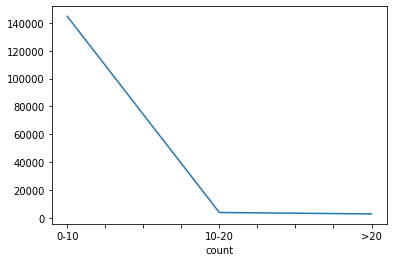

In [16]:
res.plot()

151620 Unique User Ids are present

In [17]:
res

count
0-10     144756
10-20      3941
>20        2923
Name: count, dtype: int64

In [18]:
reviews["business_id"].value_counts()

business_id
I_3LMZ_1m2mzR0oLIOePIg    4093
iRIHK8-EwpeffwvoO4nzIA    2170
2BMk_drsikKWslJCXmQtjQ    2023
R8t9g5nvi7VFyS8zsgmj8Q    1788
cQIh4YJlVtZI9TLF5_smOg    1781
                          ... 
FW9ozwOA7sOSS8EDr6fg_Q       5
JqLGx2zcKVd6YhctqWCNBg       5
ly1bPRLBnGbC98m96D8i-g       5
8tt_vJrwlmnxgjaInr5ldQ       5
9vtbZ5M2LlXbP1w50mB_IQ       5
Name: count, Length: 10913, dtype: int64

# Business Data

In [19]:
df = pd.read_json("../data/mo_business.json")
print(df.columns)
print(df.iloc[0].to_dict())

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
{'business_id': 'mpf3x-BjTdTEA3yCZrAYPw', 'name': 'The UPS Store', 'address': '87 Grasso Plaza Shopping Center', 'city': 'Affton', 'state': 'MO', 'postal_code': '63123', 'latitude': 38.551126, 'longitude': -90.335695, 'stars': 3.0, 'review_count': 15, 'is_open': 1, 'attributes': {'BusinessAcceptsCreditCards': 'True'}, 'categories': 'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services', 'hours': {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}}


In [20]:
def clean_boolean(value):
    if isinstance(value, str):
        return value.lower() == 'true'
    return bool(value) if value is not None else None

In [21]:
## fillna
df['attributes'] = df['attributes'].apply(lambda x: {} if pd.isna(x) else x)
df['attributes'] = df['attributes'].apply(lambda x: {'BusinessAcceptsCreditCards': clean_boolean(x.get('BusinessAcceptsCreditCards'))} if isinstance(x, dict) else {})
df['hours'] = df['hours'].apply(lambda x: {} if pd.isna(x) else x)
df['categories'] = df['categories'].fillna("Unknown")

## dtype mapping
df['is_open'] = df['is_open'].astype(bool)
df['business_id'] = df['business_id'].astype(str)
df['name'] = df['name'].astype(str)
df['postal_code'] = df['postal_code'].astype(str)

In [22]:
## fillna
df['attributes'] = df['attributes'].apply(lambda x: {} if pd.isna(x) else x)
df['attributes'] = df['attributes'].apply(lambda x: {'BusinessAcceptsCreditCards': clean_boolean(x.get('BusinessAcceptsCreditCards'))} if isinstance(x, dict) else {})
df['hours'] = df['hours'].apply(lambda x: {} if pd.isna(x) else x)
df['categories'] = df['categories'].fillna("Unknown")

## dtype mapping
df['is_open'] = df['is_open'].astype(bool)
df['business_id'] = df['business_id'].astype(str)
df['name'] = df['name'].astype(str)
df['postal_code'] = df['postal_code'].astype(str)

In [23]:
df["business_id"].value_counts()

business_id
mpf3x-BjTdTEA3yCZrAYPw    1
LCMpkeQWHdCbuX0Nlkmeow    1
4aSj0fmfFT2iqxr4-AzalA    1
VcamrM5awvkJrvkBgUNaIw    1
V7nIENZIo9zPrkQ-qRxHWA    1
                         ..
R8-iNVaAd0xLPes8oAQ6Rw    1
mPuEgppqgqF9cvvlGTEocg    1
9OH9xOearyJrCPXL9xOImA    1
2xTj2i6yngysac6jrkbUOg    1
LTeBejee7jIpaYWWll-Ubw    1
Name: count, Length: 10913, dtype: int64

In [24]:
index_name = "business_data"

mapping = {
    "mappings": {
        "properties": {
            "business_id": {"type": "keyword"},
            "name": {"type": "text"},
            "address": {"type": "text"},
            "city": {"type": "keyword"},
            "state": {"type": "keyword"},
            "postal_code": {"type": "keyword"},
            "location": { "type": "geo_point" },
            "latitude": {"type": "float"},
            "longitude": {"type": "float"},
            "stars": {"type": "float"},
            "review_count": {"type": "integer"},
            "is_open": {"type": "boolean"},
            "attributes": {
                "properties": {
                    "BusinessAcceptsCreditCards": {"type": "boolean"}
                }
            },
            "categories": {"type": "text"},
            "hours": {
                "properties": {
                    "Monday": {"type": "text"},
                    "Tuesday": {"type": "text"},
                    "Wednesday": {"type": "text"},
                    "Thursday": {"type": "text"},
                    "Friday": {"type": "text"},
                    "Saturday": {"type": "text"},
                    "Sunday": {"type": "text"}
                }
            }
        }
    }
}

In [25]:
from elasticsearch.helpers import bulk

In [26]:
if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name, body=mapping)
    print(f"Index '{index_name}' created successfully!")
else:
    print(f"Index '{index_name}' already exists.")

Index 'business_data' already exists.


In [27]:
def upload_to_elastic(df, index_name):
    for _, row in df.iterrows():
        row_data = row.to_dict()
        row_data['location'] = {
            'lat': row_data['latitude'],
            'lon': row_data['longitude']
        }
        yield {
            "_index": index_name,
            "_id": row_data['business_id'],
            "_source": row_data
        }

try:
    response = bulk(es, upload_to_elastic(df, index_name))
    print("Data uploaded successfully:", response)
except Exception as e:
    print("Error uploading data:", e)

Data uploaded successfully: (10913, [])


In [28]:
search_query = {
    "query": {
        "match": {
            "name": "pizza"
        }
    }
}

response = es.search(index="business_data", body=search_query)

for hit in response['hits']['hits']:
    print(f"Business Name: {hit['_source']['name']}, Score: {hit['_score']}")

Business Name: Imo's Pizza, Score: 4.2314672
Business Name: Domino's Pizza, Score: 4.2314672
Business Name: Elicia's Pizza, Score: 4.2314672
Business Name: Reavis Pizza, Score: 4.2314672
Business Name: Imo's Pizza, Score: 4.2314672
Business Name: Imo's Pizza, Score: 4.2314672
Business Name: Marco's Pizza, Score: 4.2314672
Business Name: Jet's Pizza, Score: 4.2314672
Business Name: Pizza Hut, Score: 4.2314672
Business Name: Pizza Hut, Score: 4.2314672


In [29]:
df['latitude'], df['longitude']

(0        38.551126
 1        38.627695
 2        38.565165
 3        38.613576
 4        38.617272
            ...    
 10908    38.572572
 10909    38.715094
 10910    38.660185
 10911    38.641988
 10912    38.631909
 Name: latitude, Length: 10913, dtype: float64,
 0       -90.335695
 1       -90.340465
 2       -90.321087
 3       -90.322383
 4       -90.212784
            ...    
 10908   -90.333021
 10909   -90.455972
 10910   -90.225247
 10911   -90.261655
 10912   -90.444269
 Name: longitude, Length: 10913, dtype: float64)

In [30]:
top_left = {"lat": 38.71, "lon": -90.45}     
bottom_right = {"lat": 38.55, "lon": -90.21} 

search_query = {
    "query": {
        "geo_bounding_box": {
            "location": {  
                "top_left": top_left,
                "bottom_right": bottom_right
            }
        }
    }
}

response = es.search(index="business_data", body=search_query)

for hit in response['hits']['hits']:
    print(f"Business Name: {hit['_source']['name']}, Location: {hit['_source']['location']}")

Business Name: The UPS Store, Location: {'lat': 38.551126, 'lon': -90.335695}
Business Name: Famous Footwear, Location: {'lat': 38.627695, 'lon': -90.340465}
Business Name: Tsevi's Pub And Grill, Location: {'lat': 38.5651648, 'lon': -90.3210868}
Business Name: TKO DJs, Location: {'lat': 38.6135761, 'lon': -90.3223828}
Business Name: Ricardo's Italian Cafe, Location: {'lat': 38.6172724, 'lon': -90.2127841}
Business Name: Sunset 44 Bistro, Location: {'lat': 38.5832229, 'lon': -90.4071872}
Business Name: Budweiser Brewery Experience, Location: {'lat': 38.6001971, 'lon': -90.2135377}
Business Name: Passport Health, Location: {'lat': 38.6361966, 'lon': -90.3457542}
Business Name: McDonald's, Location: {'lat': 38.6124951839, 'lon': -90.2219420671}
Business Name: Eddie's Southtown Donuts, Location: {'lat': 38.5857552, 'lon': -90.2768425}


# Mappings

In [31]:
mappings = {
    "properties": {
        "review_id": {"type": "keyword"},
        "user_id": {"type": "keyword"},
        "business_id": {"type": "keyword"},
        "stars": {"type": "integer"},
        "useful": {"type": "integer"},
        "funny": {"type": "integer"},
        "cool": {"type": "integer"},
        "text": {"type": "text"},
        "date": {"type": "date"},
        # "text_vector": {
        #     "type": "dense_vector",
        #     "similarity": "cosine",
        # },
    }
}


es.indices.create(index="review_index", mappings=mappings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'review_index'})

In [32]:
operations = []
for _, row in reviews.iterrows():
    row_data = row.to_dict()
    # row_data["text_vector"] = model.encode(row_data["text"]).tolist()
    record = {
        '_op_type': 'index',
        '_index': 'review_index',
        '_source': row_data
    }
    operations.append(record)

In [33]:
len(operations)

502385

In [34]:
try:
    response =  bulk(es, operations)
    print("Data uploaded successfully:", response)
except Exception as e:
    print("Error uploading data:", e)

Data uploaded successfully: (502385, [])


#### 1. Number of Reviews

In [54]:
query = {
    "query": {
        "term": {"user_id": "bYENop4BuQepBjM1-BI3fA"}
    },
    "aggs": {
        "review_count": {"value_count": {"field": "user_id"}},
        "unique_businesses": {
            "terms": {
                "field": "business_id",
                "size": 5000  
            }
        }
    },
    "_source": ["business_id", "text"],
    "size": 10000  
}

try:
    response = es.search(index='review_index', body=query)

    review_count = response['aggregations']['review_count']['value']
    business_ids = [bucket['key'] for bucket in response['aggregations']['unique_businesses']['buckets']]

    print("User ID: bYENop4BuQepBjM1-BI3fA", "\nReview Count: ", review_count, "\nID of 10 Businesses Reviewed: ", business_ids[:10])
    
except Exception as e:
    print(f"Error analyzing user reviews: {e}")
    raise

User ID: bYENop4BuQepBjM1-BI3fA 
Review Count:  1392 
ID of 10 Businesses Reviewed:  ['ahpLj4hNo2-2w_xf2sNE3g', 'vuAI70USd3my2Kb9_9zajw', 'ZfZhTZ5CHU5LQDeEUGsE_Q', 'k8hFz4Gty5dHlDV4Wt8FqA', 'vD2jzpPv4iyOLKzITscGvA', '1o9IdLrFGMS2o5Y8uXKC0Q', 'LlB8qvLyxGWjduZb90EQUg', 'OcCrSDYR5cETO4FZ7R2iEg', 'eRnCmPc6TTbNK-Zs0jgYPA', 'qfABDeMSCirVPeG6BfcUEA']


In [55]:
reviews = [hit["_source"] for hit in response["hits"]["hits"]]

# Convert to DataFrame
if reviews:
    print(len(pd.DataFrame(reviews)))
else:
    print(pd.DataFrame())

1392


#### 2. Bounding Box of Business Reviewed 

In [40]:
query = {
    "query": {
        "term": {"user_id": "bYENop4BuQepBjM1-BI3fA"}
    }
}

response = es.search(index='business_data', body=query)
response

ObjectApiResponse({'took': 0, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 0, 'relation': 'eq'}, 'max_score': None, 'hits': []}})

In [138]:
def bounding_box(X, Y, r=10, R=6.4):
    C = 2 * np.pi * R
    
    dY = r * C / 360
    dX = dY * np.cos(np.radians(Y))
    
    Xmin, Ymin = X - dX, Y - dY
    Xmax, Ymax = X + dX, Y + dY
    return (Xmin, Ymin, Xmax, Ymax)

In [139]:
bounding_box(-90.45, 38.71)

(-91.3216272246551, 37.59298927872363, -89.5783727753449, 39.82701072127637)

In [170]:
response = es.search(
    index = "business_data", 
    query = {
        "bool": {
            "should": [{"match": {"business_id": value}} for value in business_ids]
        }
    },
    size=10000,
)

for hit in response["hits"]["hits"][:10]:
    print(bounding_box(hit["_source"]["longitude"], hit["_source"]["latitude"]))

(-91.2130947943793, 37.51068427872363, -89.46783520562069, 39.744705721276375)
(-91.1869234305881, 37.54843827872363, -89.44258316941192, 39.782459721276375)
(-91.387732786376, 37.507669278723625, -89.642399813624, 39.74169072127637)
(-91.14692526270217, 37.50140097872363, -89.40143973729782, 39.735422421276375)
(-91.06242796779257, 37.50942927872363, -89.31713783220742, 39.743450721276375)
(-91.12934570101504, 37.50977987872363, -89.38406409898496, 39.74380132127637)
(-91.27901508888033, 37.515483078723626, -89.53387231111967, 39.74950452127637)
(-91.22083946574367, 37.51773179752363, -89.47575142985633, 39.751753240076376)
(-91.12837360181501, 37.50270447872363, -89.38291979818499, 39.736725921276374)
(-91.16269003548155, 37.46477537872363, -89.41631356451845, 39.698796821276375)
